In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
lr = 0.0002
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers

optim_g = optim.Adam(generator.parameters(), lr=lr)
optim_d = optim.Adam(discriminator.parameters(), lr=lr)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:03, 37.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


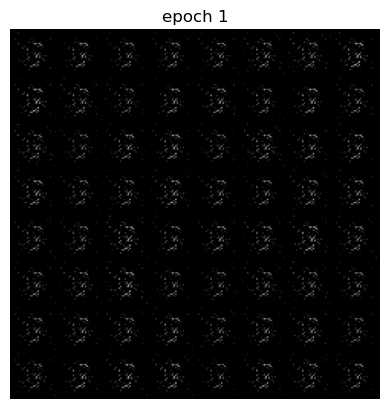

Epoch 1 of 100
Generator loss: 1.29755278, Discriminator loss: 0.97842133


118it [00:02, 45.79it/s]                         
118it [00:02, 45.74it/s]                         
118it [00:02, 45.27it/s]                         
118it [00:02, 45.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


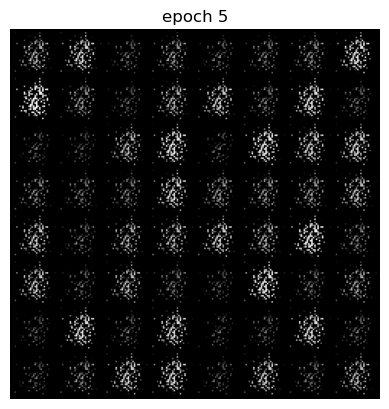

Epoch 5 of 100
Generator loss: 5.50007915, Discriminator loss: 0.55432519


118it [00:02, 45.71it/s]                         
118it [00:02, 45.94it/s]                         
118it [00:02, 46.03it/s]                         
118it [00:02, 44.91it/s]                         
118it [00:02, 45.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


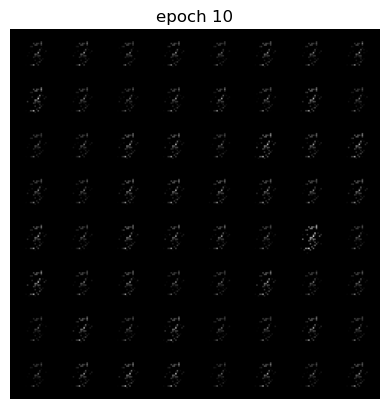

Epoch 10 of 100
Generator loss: 1.46190429, Discriminator loss: 1.10493902


118it [00:02, 45.57it/s]                         
118it [00:02, 46.10it/s]                         
118it [00:02, 46.08it/s]                         
118it [00:02, 46.15it/s]                         
118it [00:02, 45.15it/s]                         
118it [00:02, 45.97it/s]                         
118it [00:02, 45.68it/s]                         
118it [00:02, 45.79it/s]                         
118it [00:02, 45.86it/s]                         
118it [00:02, 44.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


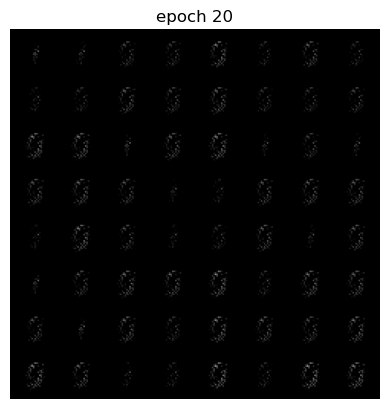

Epoch 20 of 100
Generator loss: 3.01979856, Discriminator loss: 0.64465558


118it [00:02, 45.66it/s]                         
118it [00:02, 45.96it/s]                         
118it [00:02, 45.31it/s]                         
118it [00:02, 45.08it/s]                         
118it [00:02, 45.67it/s]                         
118it [00:02, 45.07it/s]                         
118it [00:02, 46.06it/s]                         
118it [00:02, 45.22it/s]                         
118it [00:02, 44.90it/s]                         
118it [00:02, 46.02it/s]                         
118it [00:02, 45.31it/s]                         
118it [00:02, 46.13it/s]                         
118it [00:02, 46.12it/s]                         
118it [00:02, 46.01it/s]                         
118it [00:02, 45.72it/s]                         
118it [00:02, 45.41it/s]                         
118it [00:02, 45.32it/s]                         
118it [00:02, 44.92it/s]                         
118it [00:02, 44.89it/s]                         
118it [00:02, 45.93it/s]                         


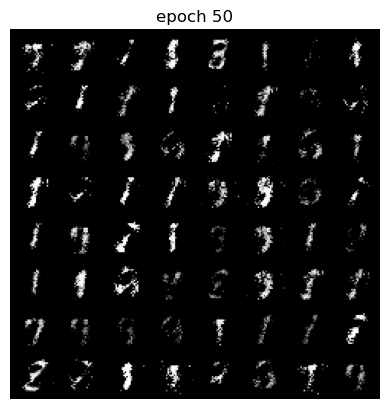

Epoch 50 of 100
Generator loss: 2.61725740, Discriminator loss: 0.58529429


118it [00:02, 45.92it/s]                         
118it [00:02, 45.81it/s]                         
118it [00:02, 45.20it/s]                         
118it [00:02, 45.92it/s]                         
118it [00:02, 45.80it/s]                         
118it [00:02, 45.91it/s]                         
118it [00:02, 45.00it/s]                         
118it [00:02, 45.90it/s]                         
118it [00:02, 44.64it/s]                         
118it [00:02, 45.32it/s]                         
118it [00:02, 45.40it/s]                         
118it [00:02, 45.76it/s]                         
118it [00:02, 45.92it/s]                         
118it [00:02, 45.13it/s]                         
118it [00:02, 45.73it/s]                         
118it [00:02, 45.63it/s]                         
118it [00:02, 45.43it/s]                         
118it [00:02, 45.47it/s]                         
118it [00:02, 45.61it/s]                         
118it [00:02, 44.90it/s]                         


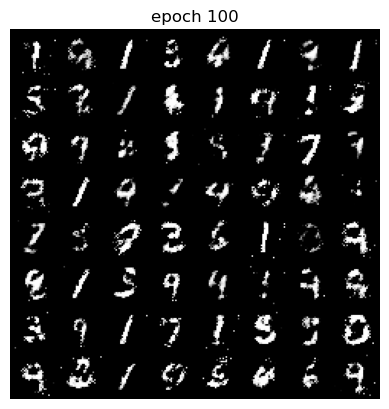

Epoch 100 of 100
Generator loss: 2.27026424, Discriminator loss: 0.73685881


In [14]:
torch.manual_seed(7777)
noise_strength = 0.2
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label) 
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        
        
        ############ YOUR CODE HERE ########## 
       
        
        # Real data
        
        for i in range(k):
            optim_d.zero_grad()
            real_images, _ = data
            real_images = real_images.to(device)
            batch_size = len(real_images)
            labelreal = label_real(batch_size)

            output_real = discriminator(real_images)
            loss_real = generator_loss(output_real, labelreal)

            # Fake data
            fake_images = generator(create_noise(batch_size, nz))
            labelfake = label_fake(fake_images.size(0))

            output_fake = discriminator(fake_images)
            loss_fake = discriminator_loss(output_fake, labelfake)
        
            # Update discriminator
            loss_dis = loss_real + loss_fake
            loss_dis.backward()
            optim_d.step()
            loss_d += loss_dis.data.item()
        # Training Generator
      
        optim_g.zero_grad()
        fake_images = generator(create_noise(batch_size, nz))
        fake_images_n = fake_images+ torch.randn_like(fake_images) * noise_strength
        labelreal = label_real(fake_images_n.size(0))
        output_fake = discriminator(fake_images_n)
        loss_gen = generator_loss(output_fake, labelreal)

        # Update generator
        loss_gen.backward()
        loss_g += loss_gen.data.item()
        optim_g.step()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    # visualize generated images
    if (epoch + 1) in [1, 5, 10, 20, 50, 100]:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
        print(f"Epoch {epoch+1} of {epochs}")
        print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")
    
    # save the generated torch tensor models to disk
    
    
    

DONE TRAINING


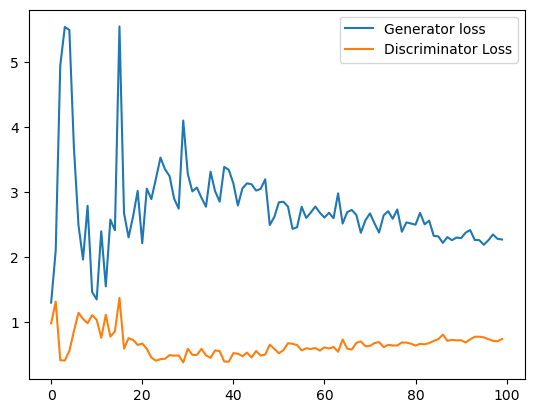

In [16]:
print('DONE TRAINING')
!mkdir -p outputs2
torch.save(generator.state_dict(), 'outputs2/generator.pth')
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')